In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import random 

In [2]:
# INPUT: set path for data placement 
#os.chdir(r'C:\Users\mshafin\Desktop\xavient_churn_project')
os.chdir(r'C:\Users\mohammad shafin\Desktop\xavient_churn_project')

os.getcwd()
random.seed(42)

In [3]:
# INPUT: data loaded to a pandas dataframe
df = pd.read_csv('telecom_churn_training.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null object
OnlineBackup        5634 non-null object
DeviceProtection    5634 non-null object
TechSupport         5634 non-null object
StreamingTV         5634 non-null object
StreamingMovies     5634 non-null object
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5626 non-null float64
Churn               5634 non-null object
dtypes: float64(2), int64(2), ob

In [5]:
# count number of missing values in each column
# sum True's
print("Columnwise missing value count")
df.isnull().sum()

Columnwise missing value count


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [6]:
# INPUT: set customer identification code and target variable
customer_identity_code = 'customerID'
target_code = 'Churn'

In [7]:
# set index for customer identification code
df = df.set_index(customer_identity_code)

In [8]:
# identify target variable
df['target'] = df[target_code]

In [9]:
# set target labels from input
label_target1 = 'Yes'
label_target0 = 'No'

In [10]:
# function to recode target levels
def dependent_col(row):
    if row['target'] == label_target1:
        val = 1  # input
    elif row['target'] == label_target0:
        val = 0  # imput
    else:
        val = 2
    return val

In [11]:
df['target'] = df.apply(dependent_col, axis=1)
print(df.loc[:,['target','Churn']].sample(5)) #check changes in target recoding

            target Churn
customerID              
8259-DZLIZ       0    No
4829-AUOAX       1   Yes
7184-LRUUR       0    No
4789-KWMXN       1   Yes
2982-VPSGI       1   Yes


In [12]:
# droping initial target
df = df.drop(['Churn'],axis=1)

In [13]:
# populate with columns, which needs to be considered 'object' type
object_columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                  'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'Contract','PaperlessBilling','PaymentMethod'] 

In [14]:
for column in object_columns:
    df[column] = df[column].astype('object')

In [15]:
print("Value count of each level for datatype 'object'")
feature_names = list(df[object_columns])

for column in feature_names:
    if df[column].dtypes == "object":
        print (column)
        print (df[column].value_counts(dropna=False))

Value count of each level for datatype 'object'
gender
Male      2885
Female    2749
Name: gender, dtype: int64
SeniorCitizen
0    4728
1     906
Name: SeniorCitizen, dtype: int64
Partner
No     2913
Yes    2721
Name: Partner, dtype: int64
Dependents
No     3936
Yes    1698
Name: Dependents, dtype: int64
PhoneService
Yes    5077
No      557
Name: PhoneService, dtype: int64
MultipleLines
No                  2686
Yes                 2391
No phone service     557
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    2470
DSL            1935
No             1229
Name: InternetService, dtype: int64
OnlineSecurity
No                     2763
Yes                    1642
No internet service    1229
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     2468
Yes                    1937
No internet service    1229
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     2480
Yes                    1925
No internet service    1229
Name: DeviceProtection, 

In [16]:
#remove_from_description = ['SeniorCitizen','target'] # remove non continious variables
#removed_from_description = [x for x in feature_names if (x not in remove_from_description)]
#feature_names.remove(removed_from_description);
#for column in feature_names:
#    if df[column].dtypes != "object":
#        print (column)
#        print (df[column].describe())

In [17]:
# object variables converted to categories for cat.codes
object_columns = df.select_dtypes(['object']).columns

In [18]:
print("The following columns were successfully imputed with missing value indicator 'UKNOWN'")
for column in object_columns:
    if df[column].dtypes=="object":
        print(column)
        df[column] = df[column].fillna("UKNOWN").astype('object')
        #print(df[column].value_counts())

The following columns were successfully imputed with missing value indicator 'UKNOWN'
gender
SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


In [19]:
for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              5634 non-null category
SeniorCitizen       5634 non-null category
Partner             5634 non-null category
Dependents          5634 non-null category
tenure              5634 non-null int64
PhoneService        5634 non-null category
MultipleLines       5634 non-null category
InternetService     5634 non-null category
OnlineSecurity      5634 non-null category
OnlineBackup        5634 non-null category
DeviceProtection    5634 non-null category
TechSupport         5634 non-null category
StreamingTV         5634 non-null category
StreamingMovies     5634 non-null category
Contract            5634 non-null category
PaperlessBilling    5634 non-null category
PaymentMethod       5634 non-null category
MonthlyCharges      5634 non-null float64
TotalCharges        5626 non-null float64
target              5634 non-null int64
dtypes: category(16), float64(2

In [21]:
df[object_columns] = df[object_columns].apply(lambda x: x.cat.codes)

In [22]:
for column in object_columns:
    print (column)
    print(df[column].value_counts())

gender
1    2885
0    2749
Name: gender, dtype: int64
SeniorCitizen
0    4728
1     906
Name: SeniorCitizen, dtype: int64
Partner
0    2913
1    2721
Name: Partner, dtype: int64
Dependents
0    3936
1    1698
Name: Dependents, dtype: int64
PhoneService
1    5077
0     557
Name: PhoneService, dtype: int64
MultipleLines
0    2686
2    2391
1     557
Name: MultipleLines, dtype: int64
InternetService
1    2470
0    1935
2    1229
Name: InternetService, dtype: int64
OnlineSecurity
0    2763
2    1642
1    1229
Name: OnlineSecurity, dtype: int64
OnlineBackup
0    2468
2    1937
1    1229
Name: OnlineBackup, dtype: int64
DeviceProtection
0    2480
2    1925
1    1229
Name: DeviceProtection, dtype: int64
TechSupport
0    2776
2    1629
1    1229
Name: TechSupport, dtype: int64
StreamingTV
0    2232
2    2173
1    1229
Name: StreamingTV, dtype: int64
StreamingMovies
2    2205
0    2200
1    1229
Name: StreamingMovies, dtype: int64
Contract
0    3096
2    1363
1    1175
Name: Contract, dtype: in

In [59]:
import pandas as pd
import scipy.stats as scs


def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)[1]

In [60]:
print(chi_square_of_df_cols(df, 'DeviceProtection', 'target'))

1.258909974711413e-98


In [65]:
object_columns_final = []
for column in object_columns:
    print(column)
    print(chi_square_of_df_cols(df, column, 'target'))
    if chi_square_of_df_cols(df, column, 'target') <= 0.05:
        object_columns_final.append(column)
print(object_columns_final)

gender
0.46719142008037073
SeniorCitizen
8.062119908746922e-30
Partner
3.004335166772794e-28
Dependents
2.2261451970670335e-33
PhoneService
0.5240801438954494
MultipleLines
0.004635155064093133
InternetService
7.768693290943212e-127
OnlineSecurity
5.987520912915138e-149
OnlineBackup
1.1737228524090142e-106
DeviceProtection
1.258909974711413e-98
TechSupport
1.4566616766425946e-145
StreamingTV
1.2783797244981223e-66
StreamingMovies
3.951900513244063e-67
Contract
3.948904497226783e-204
PaperlessBilling
9.03662459339821e-50
PaymentMethod
1.0480838892298403e-111
['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [25]:
# missing value treatments
# impute missing numeric columns with mean
numeric_columns_mean = ['MonthlyCharges','tenure','TotalCharges'] # populate with numeric columns
# impute missing numeric columns with zero
numeric_columns_zero = [] # populate with numeric columns
scale_columns = numeric_columns_mean + numeric_columns_zero
 

In [26]:
# for mean imputation
for column in numeric_columns_mean:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(df[column].mean())
# for 0 imputation
for column in numeric_columns_zero:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(0)

In [27]:
from sklearn.preprocessing import scale
for column in scale_columns:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = scale(df[column].astype('float64'))

In [28]:
from sklearn.model_selection import train_test_split

In [118]:
#df.columns
target_column = ['target']
all_columns = scale_columns + object_columns_final + target_column
print(all_columns)
df = df[all_columns]

['MonthlyCharges', 'tenure', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'target']


In [119]:
df1 = df.drop(['target'],axis=1).copy()

In [120]:
#df1 = df.copy()
#df1.shape
df1.columns

Index(['MonthlyCharges', 'tenure', 'TotalCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [73]:
X = df1.values
y = df[['target']].values
X.shape,y.shape

((5634, 17), (5634, 1))

In [74]:
feature_selected = X.shape[1]
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
no_features = feature_selected # Input
model = RandomForestRegressor()
rfe = RFE(model, no_features)
fit = rfe.fit(X, y)


c:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
print("Num Features: " + str(fit.n_features_))
print("Selected Features: " + str(fit.support_))
print("Feature Ranking: " + str(fit.ranking_))

Num Features: 17
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [76]:
df1.columns[fit.support_]

Index(['MonthlyCharges', 'tenure', 'TotalCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [77]:
X = df[df1.columns[fit.support_]].values
y = df['target'].values
#array1 = 
#X = array1.values
#y = y.values
X.shape,y.shape

((5634, 17), (5634,))

In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=21,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3943, 17), (1691, 17), (3943,), (1691,))

In [128]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(X_train,y_train)   #lm.fit(input,output)
lm.coef_

coefficients = pd.concat([pd.DataFrame(df1.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients

,0,0
0,MonthlyCharges,0.147793
1,tenure,-0.034041
2,TotalCharges,-0.110232
3,SeniorCitizen,0.057312
4,Partner,-0.009334
5,Dependents,-0.007490
6,MultipleLines,0.019983
7,InternetService,0.013798
8,OnlineSecurity,-0.041378
9,OnlineBackup,-0.026654


('GBM', 0.7927912356229518, 0.01861018421450971)
('RF', 0.7755503437640556, 0.019106401065164588)
('DT', 0.7291344856390156, 0.022173628256622644)
('ADA', 0.7953273790400308, 0.018141380497431386)


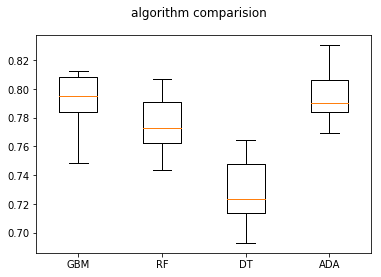

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import model_selection
import matplotlib.pyplot as plt

# generate list of models  
models = []
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('ADA', AdaBoostClassifier()))


# check model performance
results = []
names = []
seed = 7
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print (msg)

# compare algorithms
fig = plt.figure()
fig.suptitle("algorithm comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("accuracy :" +str(accuracy))
    print("matrix :")
    print(matrix)
    print("report :")
    print(report)
    return accuracy

In [81]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier

In [82]:
from pprint import pprint
GBM = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(100, 2000, num = 20)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
max_features = ['sqrt','auto','log2','None','1','0.1']
loss = ['deviance', 'exponential']
max_depth = [4, 6, 8]
criterion = ['friedman_mse']
min_samples_split = [2, 5, 10]
min_samples_leaf = [20,50,100,150]
random_state = [21]
# Create the random grid
random_grid_gbm = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss':loss,
               'max_depth': max_depth,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}
pprint(random_grid_gbm)

{'criterion': ['friedman_mse'],
 'learning_rate': [0.1, 0.05, 0.02, 0.01],
 'loss': ['deviance', 'exponential'],
 'max_depth': [4, 6, 8],
 'min_samples_leaf': [20, 50, 100, 150],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000],
 'random_state': [21]}


In [84]:
GBM = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
gbm_random = RandomizedSearchCV(estimator = GBM, param_distributions = random_grid_gbm, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [85]:
# Fit the random search model
gbm_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   30.2s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'loss': ['deviance', 'exponential'], 'max_depth': [4, 6, 8], 'criterion': ['friedman_mse'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [20, 50, 100, 150], 'random_state': [21]},
          pre_

In [86]:
gbm_best_accuracy = evaluate(gbm_random,X_test,y_test)

accuracy :0.8083973979893554
matrix :
[[1115  100]
 [ 224  252]]
report :
             precision    recall  f1-score   support

          0       0.83      0.92      0.87      1215
          1       0.72      0.53      0.61       476

avg / total       0.80      0.81      0.80      1691



[ 5  4 12 13 10  7  3  9  8 15  6 11 16 14  1  0  2]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


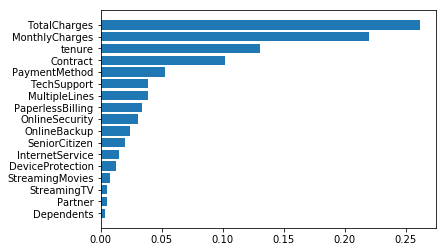

['MonthlyCharges' 'tenure' 'TotalCharges' 'SeniorCitizen' 'Partner'
 'Dependents' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod']
[0.21977107 0.13041145 0.26121144 0.01985728 0.00481142 0.00351052
 0.03839997 0.0151754  0.03048089 0.02418185 0.0129097  0.03862124
 0.00500326 0.00728995 0.10220758 0.03383655 0.05232042]


In [87]:
feature_names=df[df1.columns[fit.support_]].columns
feature_importance = gbm_random.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))


# In[183]:


plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])

feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_best_accuracy = evaluate(rf_random,X_test,y_test)

In [ ]:
# import pickle
import pickle

# save the model to disk
filename1 = 'finalized_gbm.sav'
pickle.dump(gbm_random, open(filename1, 'wb'))

# save the model to disk
filename2 = 'finalized_rf.sav'
pickle.dump(rf_random, open(filename2, 'wb'))

In [ ]:
feature_names=df[df1.columns[fit.support_]].columns
feature_importance = rf_random.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))


# In[183]:


plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])

feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)

In [ ]:
from pprint import pprint
ADA = AdaBoostClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(100, 2000, num = 20)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
algorithm  = ['SAMME', 'SAMME.R']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_state = [21]

# Create the random grid
random_grid_ada = {'n_estimators': n_estimators,
 #                 'learning_rate': learning_rate,
                   'algorithm':algorithm,
 #                 'max_depth': max_depth,
 #                 'min_samples_leaf': min_samples_leaf,
                   'random_state': random_state}
pprint(random_grid_ada)

In [ ]:
# First create the base model to tune
ada = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = random_grid_ada, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ada_random.fit(X_train, y_train)

In [ ]:
ada_best_accuracy = evaluate(ada_random,X_test,y_test)

In [34]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)

c:\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
input_dimenation = X.shape[1]

In [38]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = input_dimenation, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
seed=7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=100, verbose=1)

In [43]:
# Fit the model
model.fit(X_train, y_train)

Epoch 1/150
3943/3943 [==============================] - 5s 1ms/step - loss: 0.7111 - acc: 0.5148
Epoch 2/150
3943/3943 [==============================] - 0s 85us/step - loss: 0.5653 - acc: 0.7345
Epoch 3/150
3943/3943 [==============================] - 0s 83us/step - loss: 0.5201 - acc: 0.7492
Epoch 4/150
3943/3943 [==============================] - 0s 87us/step - loss: 0.4918 - acc: 0.7674
Epoch 5/150
3943/3943 [==============================] - 0s 92us/step - loss: 0.4713 - acc: 0.7745
Epoch 6/150
3943/3943 [==============================] - 0s 85us/step - loss: 0.4583 - acc: 0.7771
Epoch 7/150
3943/3943 [==============================] - 0s 92us/step - loss: 0.4493 - acc: 0.7842
Epoch 8/150
3943/3943 [==============================] - 0s 84us/step - loss: 0.4401 - acc: 0.7880
Epoch 9/150
3943/3943 [==============================] - 0s 89us/step - loss: 0.4351 - acc: 0.7870
Epoch 10/150
3943/3943 [==============================] - 0s 100us/step - loss: 0.4301 - acc: 0.7913
Epoch 11/

3943/3943 [==============================] - 0s 81us/step - loss: 0.3977 - acc: 0.8085
Epoch 83/150
3943/3943 [==============================] - 0s 86us/step - loss: 0.3966 - acc: 0.8106
Epoch 84/150
3943/3943 [==============================] - 0s 82us/step - loss: 0.3971 - acc: 0.8078
Epoch 85/150
3943/3943 [==============================] - 0s 88us/step - loss: 0.3966 - acc: 0.8090
Epoch 86/150
3943/3943 [==============================] - 0s 83us/step - loss: 0.3970 - acc: 0.8083
Epoch 87/150
3943/3943 [==============================] - 0s 84us/step - loss: 0.3963 - acc: 0.8078
Epoch 88/150
3943/3943 [==============================] - 0s 79us/step - loss: 0.3974 - acc: 0.8121
Epoch 89/150
3943/3943 [==============================] - 0s 91us/step - loss: 0.3972 - acc: 0.8095
Epoch 90/150
3943/3943 [==============================] - 0s 92us/step - loss: 0.3959 - acc: 0.8090
Epoch 91/150
3943/3943 [==============================] - 0s 85us/step - loss: 0.3958 - acc: 0.8088
Epoch 92/150
